# Naive Bayes


- Example of **Probability**:
  - Consider a dataset containing the heights of the people of a particular country. Let’s say the mean of the data is 170 & the standard deviation is 3.5.
  - When Probability has to be calculated of any situation using this dataset, then the dataset features will be constant i.e. mean & standard deviation of the dataset will be constant, they will not be altered. Let’s say the probability of height > 170 cm has to be calculated for a random record in the dataset, then that will be calculated using the information shown below:
  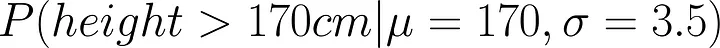
  - While calculating probability, feature value can be varied, but the characteristics(mean & Standard Deviation) of the data distribution cannot be altered.

- Example of **Likelihood**:
  - Likelihood calculation involves calculating the best distribution or best characteristics of data given a particular feature value or situation.
  - Consider the exactly same dataset example as provided above for probability, if their likelihood of height > 170 cm has to be calculated then it will be done using the information shown below:
  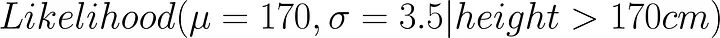
  - Here, the dataset features will be varied, i.e. Mean & Standard Deviation of the dataset will be varied in order to get the maximum likelihood for height > 170 cm.
  - The likelihood in very simple terms means to increase the chances of a particular situation to happen/occur by varying the characteristics of the dataset distribution.

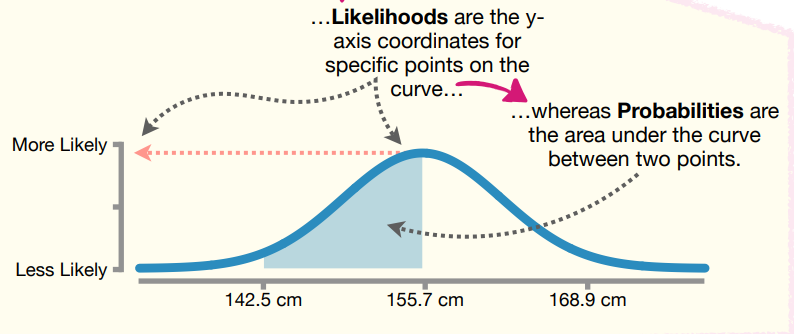

**Naive Bayes** is the most straightforward and fast classification algorithm, which is suitable for a large chunk of data. Naive Bayes classifier is successfully used in various applications such as spam filtering, text classification, sentiment analysis, and recommender systems. It uses Bayes theorem of probability for prediction of unknown class.

- **Naive Bayes classifier assumes that the effect of a particular feature in a class is independent and equal of other features**. For example, a loan applicant is desirable or not depending on his/her income, previous loan and transaction history, age, and location. Even if these features are interdependent, these features are still considered independently. This assumption simplifies computation, and that's why it is considered as naive. This assumption is called class conditional independence.
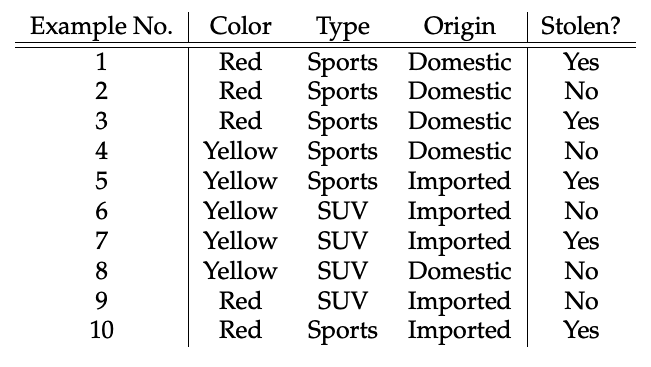

- Here in our dataset, we need to classify whether the car is stolen, given the features of the car. The columns represent these features and the rows represent individual entries. 
- According to this example, Bayes theorem can be rewritten as: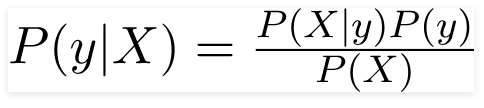
- The variable y is the class variable(stolen?), which represents if the car is stolen or not given the conditions. Variable X represents the parameters/features.
- X is given as : 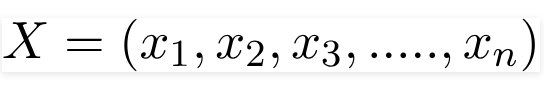
- Here x1, x2…, xn represent the features, i.e they can be mapped to Color, Type, and Origin. By substituting for X and expanding using the chain rule we get: 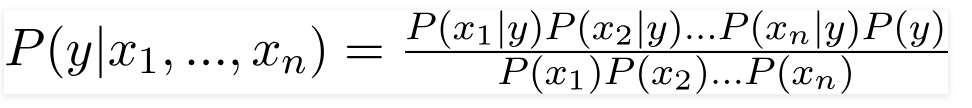

- The denominator remains same for all the individual entry hence we can ignore it.
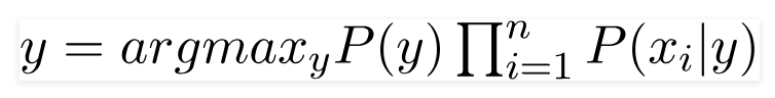

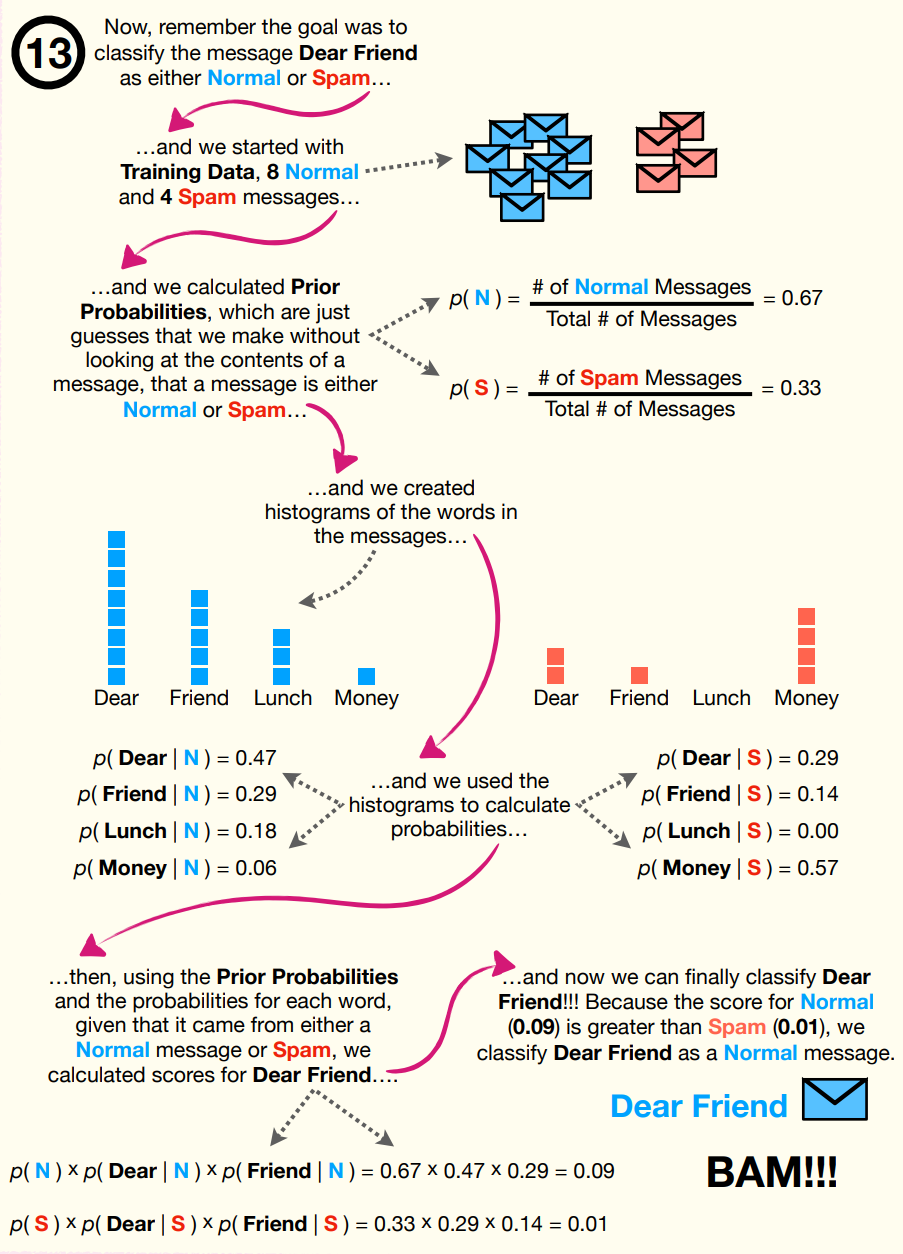

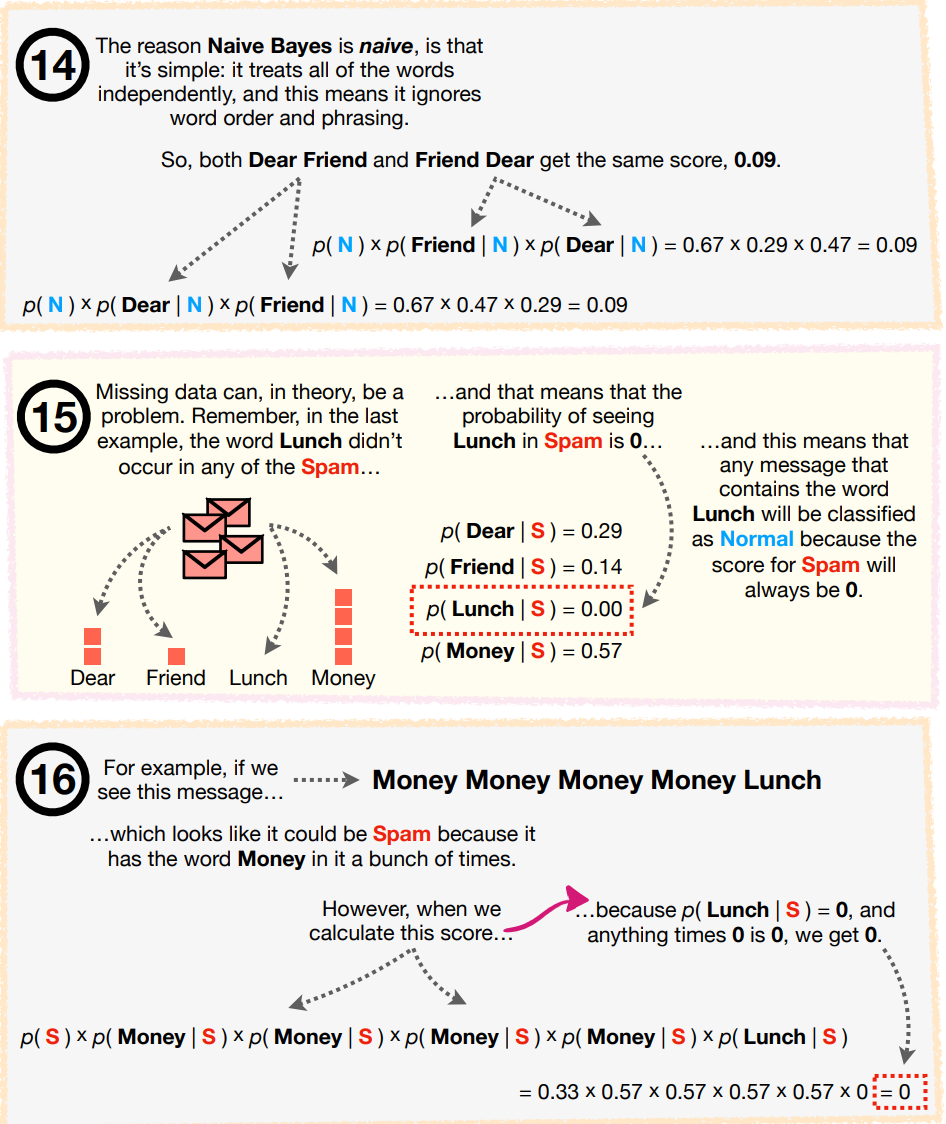

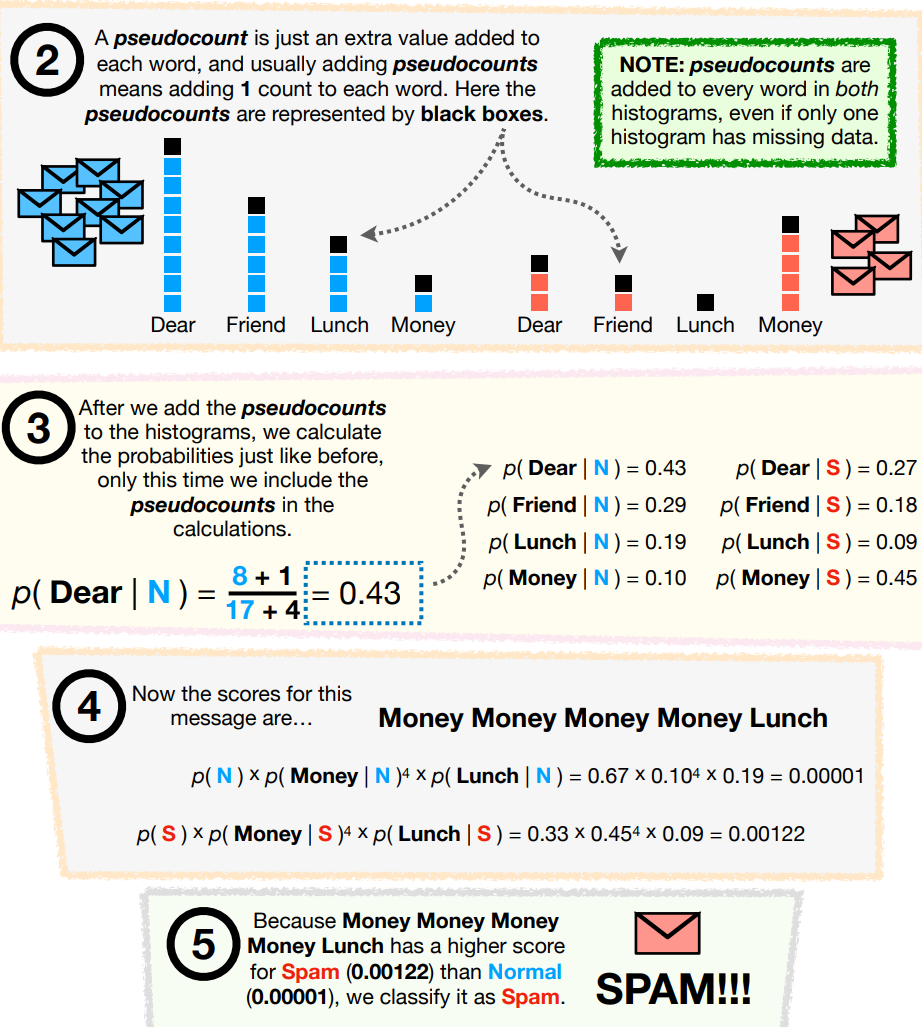

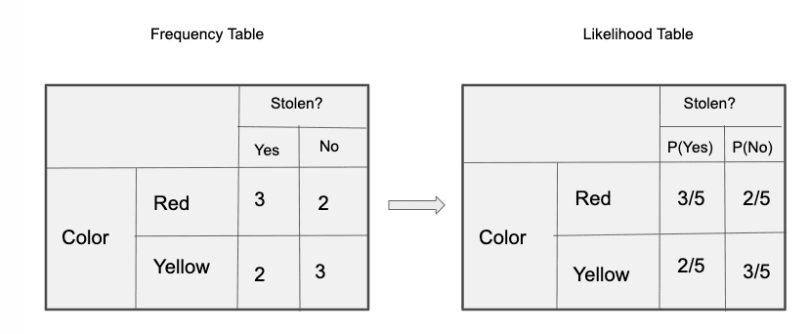
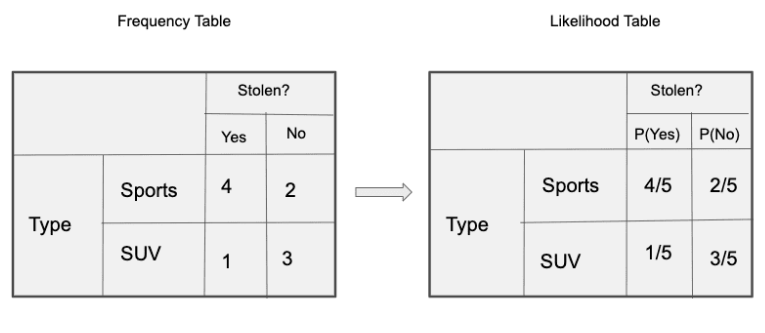
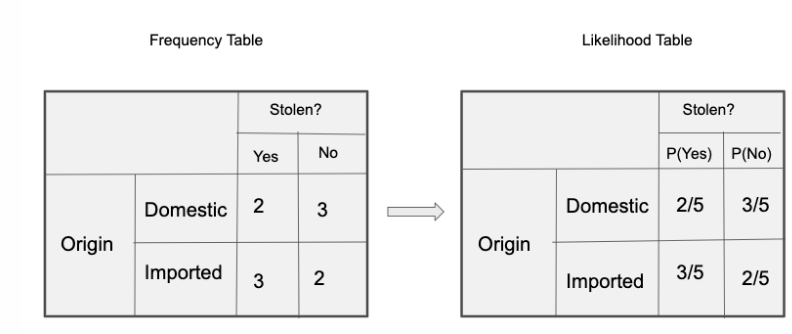

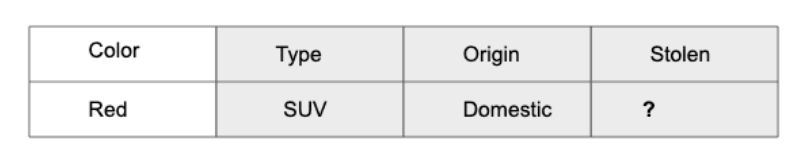

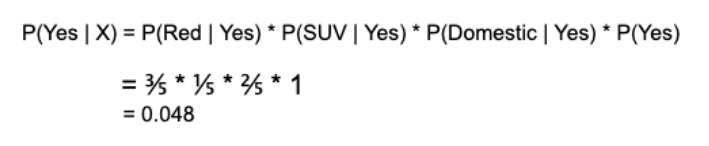
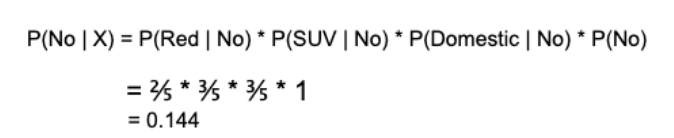

Since 0.144 > 0.048, Which means given the features RED SUV and Domestic, our example gets classified as ’NO’ the car is not stolen.

# Gaussian Naïve Bayes Classifier

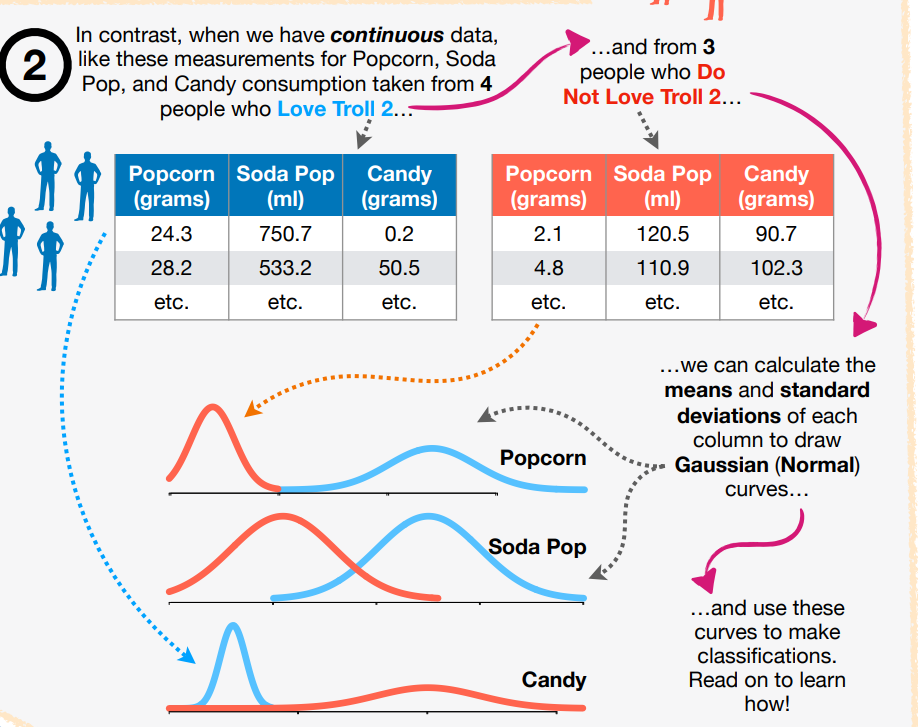

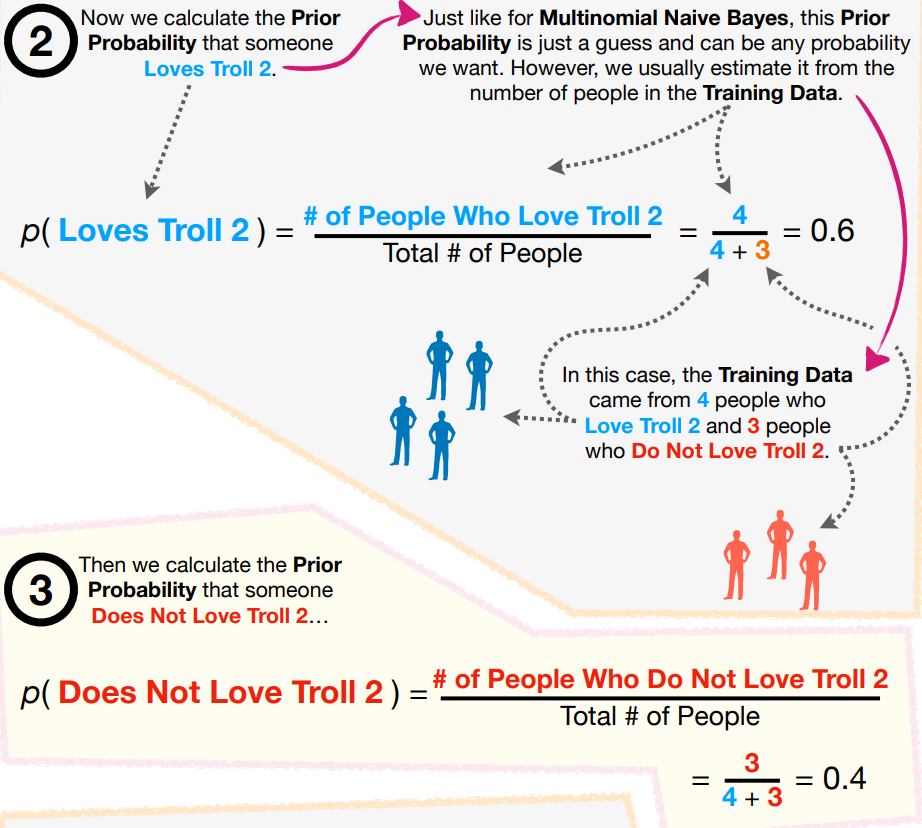

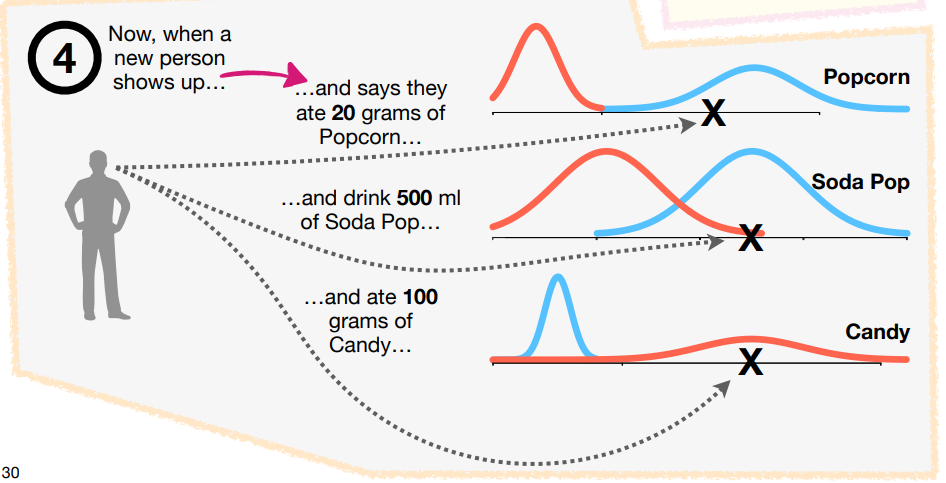

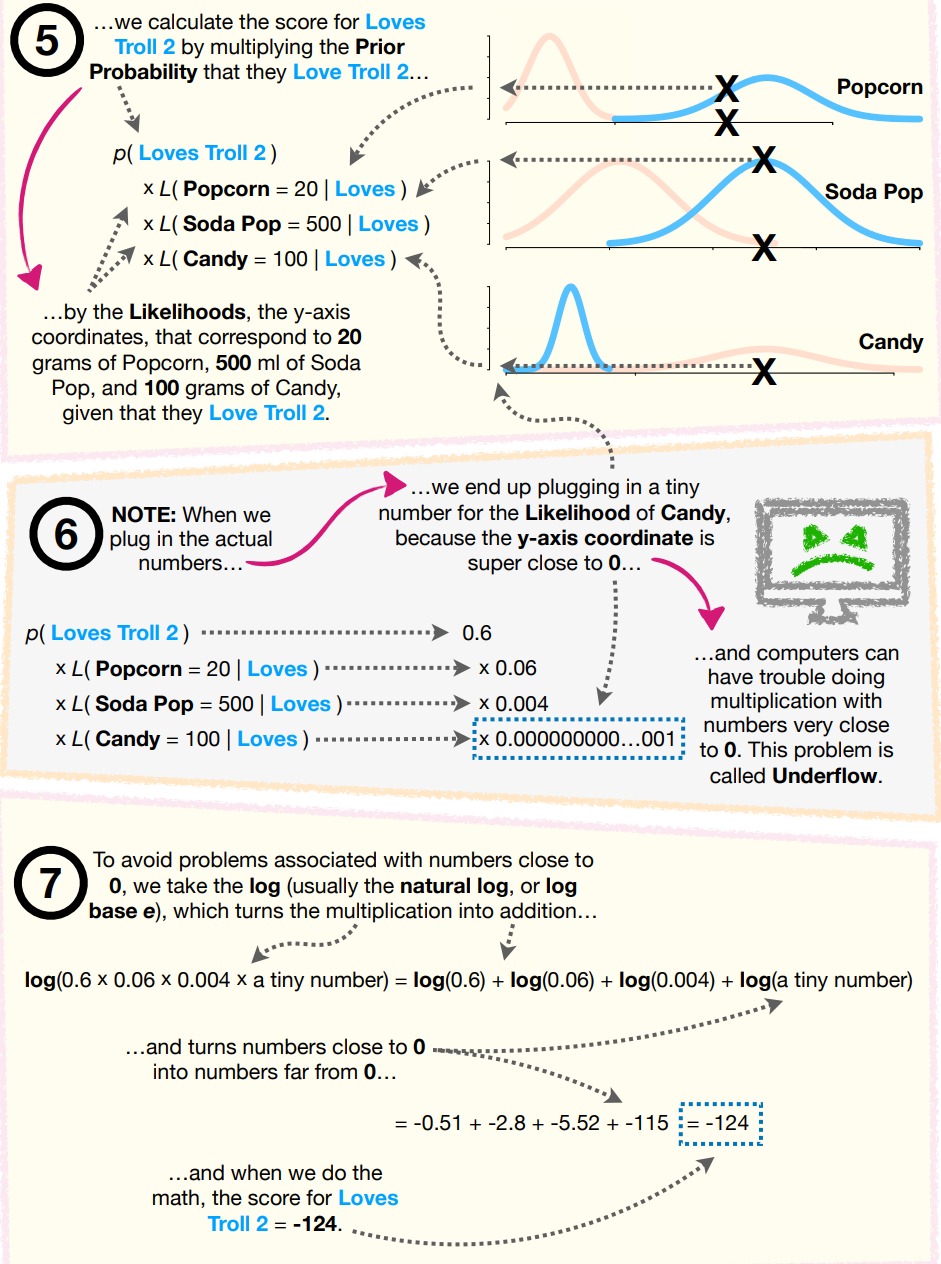

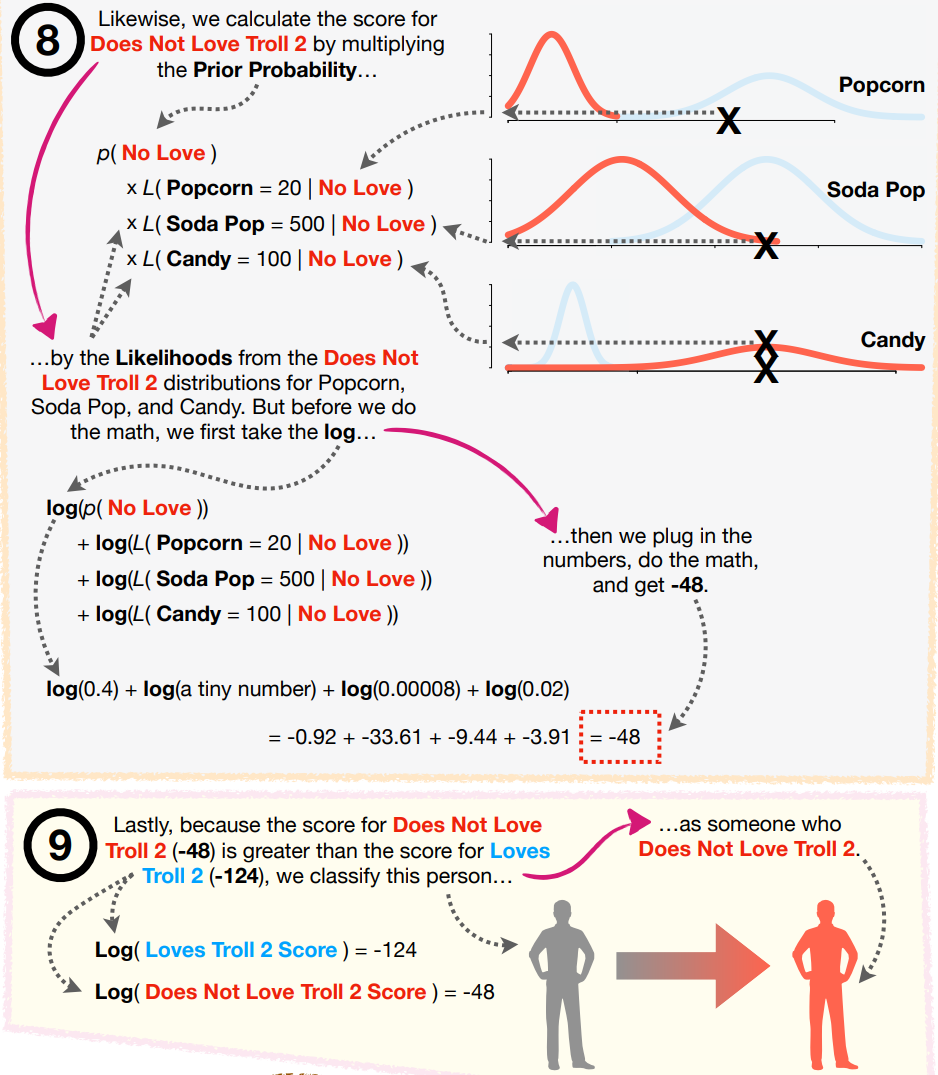

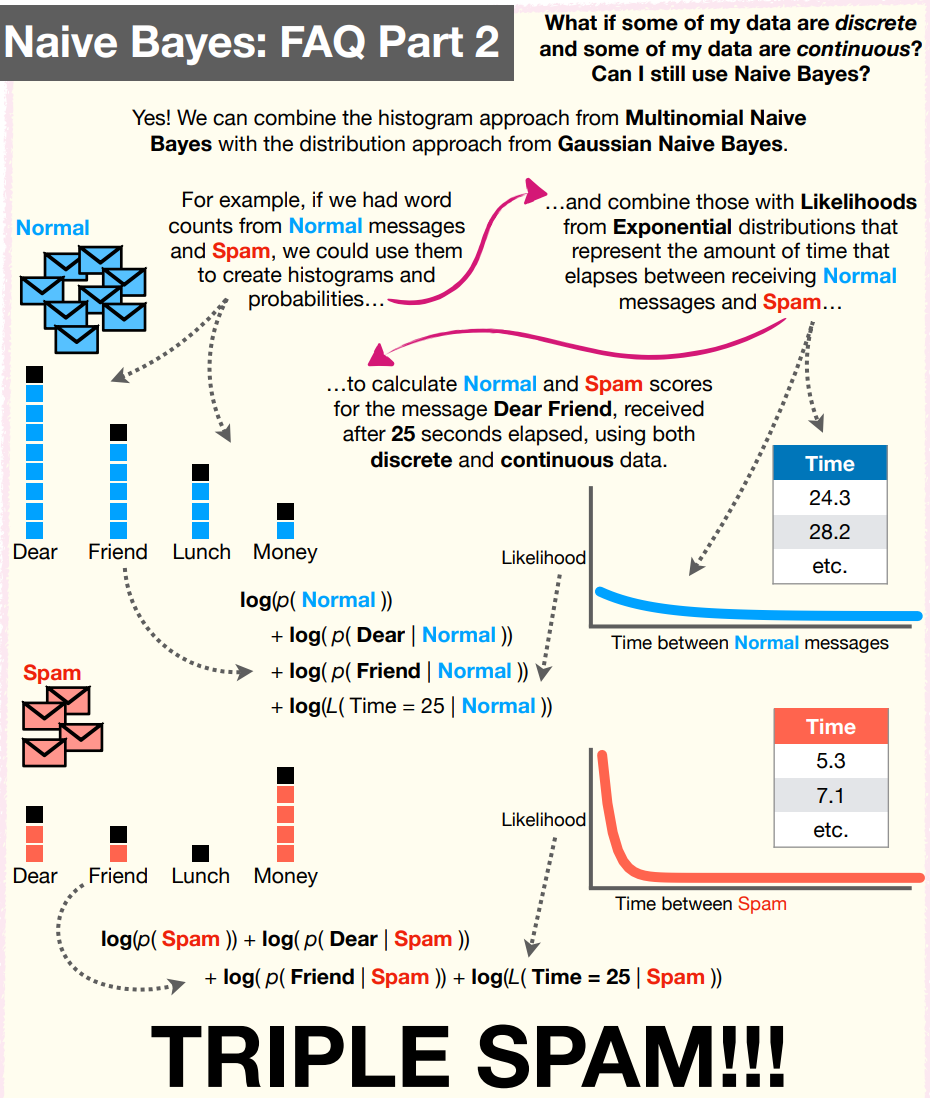

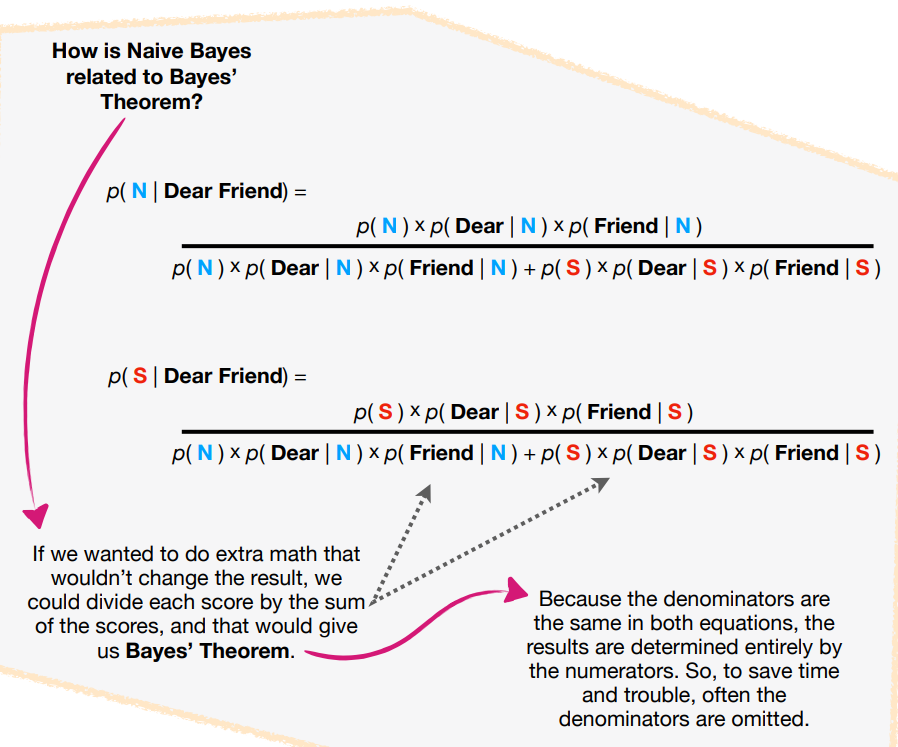

- In order to estimate the distribution parameters of the features, we assume tat the training set is following some kind of distribution. Here, we assume that it is normally distributed.
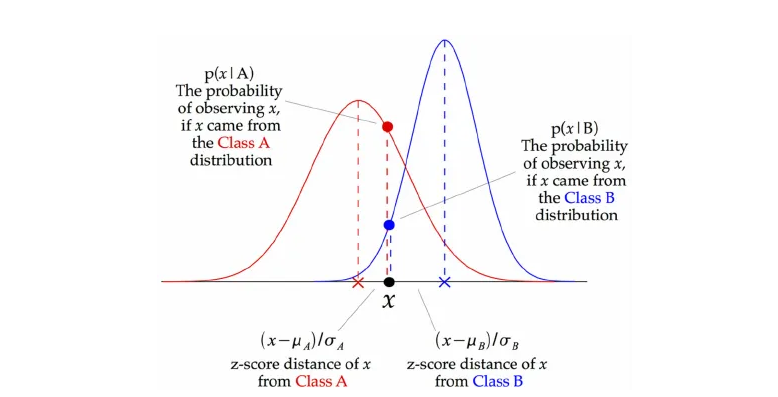

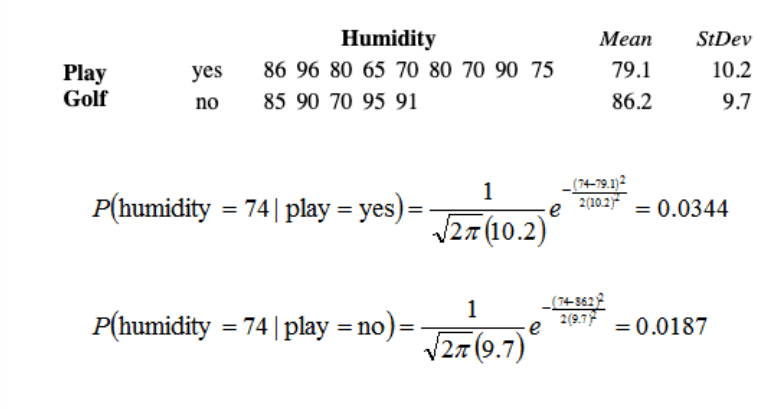

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
loan_df = pd.read_csv('loan_data.csv')
loan_df.head()

credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0               0  
1            0        0               0  
2            0        0               0  
3            0        0               0  
4            1        0               0

In [2]:
#Transform the purpose column.
loan_df = pd.get_dummies(loan_df, columns=['purpose'], drop_first=True)
loan_df.head()

credit.policy  int.rate  installment  log.annual.inc    dti  fico  \
0              1    0.1189       829.10       11.350407  19.48   737   
1              1    0.1071       228.22       11.082143  14.29   707   
2              1    0.1357       366.86       10.373491  11.63   682   
3              1    0.1008       162.34       11.350407   8.10   712   
4              1    0.1426       102.92       11.299732  14.97   667   

   days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
0        5639.958333      28854        52.1               0            0   
1        2760.000000      33623        76.7               0            0   
2        4710.000000       3511        25.6               1            0   
3        2699.958333      33667        73.2               1            0   
4        4066.000000       4740        39.5               0            1   

   pub.rec  not.fully.paid  purpose_credit_card  purpose_debt_consolidation  \
0        0               0                    0                           1   
1        0               0                    1                           0   
2        0               0                    0                           1   
3        0               0                    0                           1   
4        0               0                    1                           0   

   purpose_educational  purpose_home_improvement  purpose_major_purchase  \
0                    0                         0                       0   
1                    0                         0                       0   
2                    0                         0                       0   
3                    0                         0                       0   
4                    0                         0                       0   

   purpose_small_business  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0

In [3]:
X = loan_df.drop('not.fully.paid', axis=1)
y = loan_df['not.fully.paid']
feature_columns = X.columns

In [4]:
unique_classes = loan_df['not.fully.paid'].unique()
unique_classes

array([0, 1], dtype=int64)

Text(0.5, 1.0, 'Class Count in the entire dataset.')

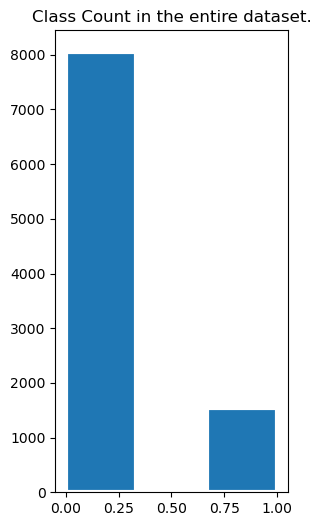

In [5]:
fig, ax = plt.subplots(1, figsize=(3,6))
ax.hist(loan_df['not.fully.paid'], bins=3, linewidth=3, edgecolor="white")
ax.set_title("Class Count in the entire dataset.")

In [6]:
#stratify 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train.head()

credit.policy  int.rate  installment  log.annual.inc    dti  fico  \
6381              1    0.1426       548.90       11.362103  12.71   687   
7589              1    0.0751       155.55       11.041321  12.75   737   
465               1    0.0983       136.00       10.778956  11.93   717   
5343              1    0.1357       339.69       11.608236  16.12   687   
8016              0    0.1312       438.78       11.654425  10.33   662   

      days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
6381        5264.041667      16799        74.7               1            1   
7589        5160.000000      11757        42.6               0            0   
465         6329.041667      19708        37.1               0            1   
5343        3330.000000       1584        49.5               1            0   
8016         660.000000          0         0.0               4            0   

      pub.rec  purpose_credit_card  purpose_debt_consolidation  \
6381        0                    1                           0   
7589        0                    1                           0   
465         0                    0                           1   
5343        0                    0                           0   
8016        0                    0                           1   

      purpose_educational  purpose_home_improvement  purpose_major_purchase  \
6381                    0                         0                       0   
7589                    0                         0                       0   
465                     0                         0                       0   
5343                    0                         0                       0   
8016                    0                         0                       0   

      purpose_small_business  
6381                       0  
7589                       0  
465                        0  
5343                       0  
8016                       0

In [7]:
print("Number of train and test data: ", len(X_train), len(X_test))

Number of train and test data:  7662 1916


Text(0.5, 1.0, 'Class Count in Test Data')

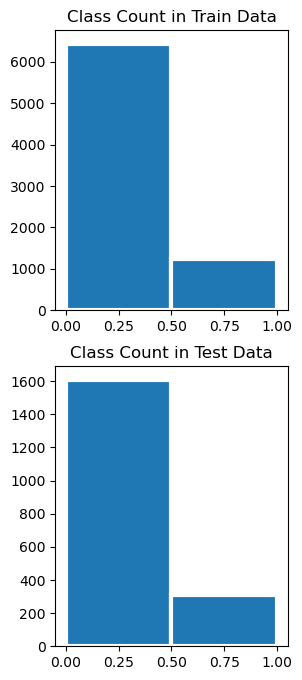

In [8]:
fig, (ax1,ax2) = plt.subplots(2, figsize=(3,8))

ax1.hist(y_train, bins=2, linewidth=3, edgecolor="white")
ax1.set_title("Class Count in Train Data")
ax2.hist(y_test, bins=2, linewidth=3, edgecolor="white")
ax2.set_title("Class Count in Test Data")

In [9]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(X_train, y_train);

In [10]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
)

y_pred = model.predict(X_test)

accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.8288100208768268
F1 Score: 0.8730500357171042


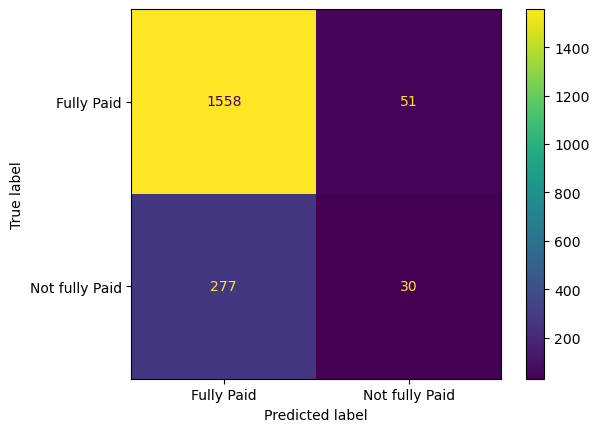

In [11]:
labels = ["Fully Paid", "Not fully Paid"]
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

# “Counting” Example

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names_out())

['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


In [13]:
print(X.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


- Using the text transformer, we can see that we have a specific number of unique strings (vocabulary) in our data.
- This can be seen by printing the vectorizer.get_feature_names() variable. We observe that we have 9 unique words.
- Next, we printed the transformed data (X) and we observe the following:
- We have 4 rows in X as the number of our text strings (we have the same number of samples after the transformation).
- We have the same number of columns (features/variables) in the transformed data (X) for all the samples (this was not the case before that transformation i.e. the individual strings had different lengths).
- The values 0,1,2, encode the frequency of a word that appeared in the initial text data.
- E.g. The first transformed row is [0 1 1 1 0 0 1 0 1] and the unique vocabulary is [‘and’, ‘document’, ‘first’, ‘is’, ‘one’, ‘second’, ‘the’, ‘third’, ‘this’], thus this means that the words “document”, “first”, “is”, “the” and “this” appeared 1 time each in the initial text string (i.e. ‘This is the first document.’).

In [14]:
import numpy as np, pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
sns.set() # use seaborn plotting style

In [15]:
# Load the dataset
data = fetch_20newsgroups()
# Get the text categories
text_categories = data.target_names
# define the training set
train_data = fetch_20newsgroups(subset="train", categories=text_categories)
# define the test set
test_data = fetch_20newsgroups(subset="test", categories=text_categories)

In [16]:
print("We have {} unique classes".format(len(text_categories)))
print("We have {} training samples".format(len(train_data.data)))
print("We have {} test samples".format(len(test_data.data)))

We have 20 unique classes
We have 11314 training samples
We have 7532 test samples


In [17]:
# let’s have a look as some training data
print(test_data.data[5])

From: banschbach@vms.ocom.okstate.edu
Subject: Re: Candida(yeast) Bloom, Fact or Fiction
Organization: OSU College of Osteopathic Medicine
Lines: 91
Nntp-Posting-Host: vms.ocom.okstate.edu

In article <1rp8p1$2d3@usenet.INS.CWRU.Edu>, esd3@po.CWRU.Edu (Elisabeth S. Davidson) writes:
> 
> In a previous article, banschbach@vms.ocom.okstate.edu () says:
>>least a few "enlightened" physicians practicing in the U.S.  It's really 
>>too bad that most U.S. medical schools don't cover nutrition because if 
>>they did, candida would not be viewed as a non-disease by so many in the 
>>medical profession.
> 
> Case Western Reserve Med School teaches nutrition in its own section as
> well as covering it in other sections as they apply (i.e. B12
> deficiency in neuro as a cause of neuropathy, B12 deficiency in
> hematology as a cause of megaloblastic anemia), yet I sill
> hold the viewpoint of mainstream medicine:  candida can cause
> mucocutaneous candidiasis, and, in already very sick patients
> 

In [19]:
# Build the model
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
# Train the model using the training data
model.fit(train_data.data, train_data.target)
# Predict the categories of the test data
predicted_categories = model.predict(test_data.data)

In [20]:
print(np.array(test_data.target_names)[predicted_categories])

['rec.autos' 'sci.crypt' 'alt.atheism' ... 'rec.sport.baseball'
 'comp.sys.ibm.pc.hardware' 'soc.religion.christian']


The accuracy is 0.7738980350504514


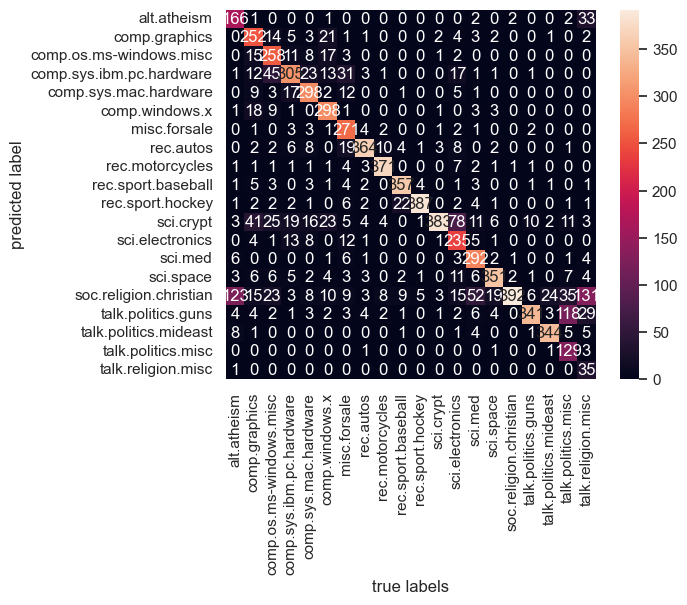

In [22]:
# plot the confusion matrix
mat = confusion_matrix(test_data.target, predicted_categories)
sns.heatmap(mat.T, square = True, annot=True, fmt = "d", xticklabels=train_data.target_names,yticklabels=train_data.target_names)
plt.xlabel("true labels")
plt.ylabel("predicted label")

print("The accuracy is {}".format(accuracy_score(test_data.target, predicted_categories)))

- It is able to correctly predict all 20 classes of the text data (most values are on the diagonal and few are off-the-diagonal).
- We also notice that the highest miss-classification (value off-the-diagonal) is 131 (5 lines from the end, last column at the right). The value 131 means that 131 documents that belonged to the “religion miscellaneous ” category were miss-classified as belonging to the “religion christian” category.